In [1]:
from geopy.distance import geodesic
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open('formulas-main/formulas.json') as f:
    data = json.load(f)

In [3]:
with open('formulas-main/wikidata.json') as f:
    metadata = json.load(f)

In [4]:
def centralize(c1, c2):

    midpoint = ((c1[0] + c2[0]) / 2, (c1[1] + c2[1]) / 2)
    translation = (-midpoint[0], -midpoint[1])

    return [
        [ c1[0] + translation[0], c1[1] + translation[1] ],
        [ c2[0] + translation[0], c2[1] + translation[1] ],
    ]


def centralize2(c1, c2):

    return [
        [ 0, 0 ],
        [ c2[0] - c1[0], c2[1] - c1[1] ],
    ]


In [5]:
coords = dict()

In [7]:
for lang in data:
    if lang not in ('cs', 'en', 'fr', 'ru', 'de', 'sl'):
        continue
    coords[lang] = list()
    for poem_id in data[lang]:
        for formula in data[lang][poem_id]:
            c1 = metadata[formula[0]]['lon'], metadata[formula[0]]['lat']
            c2 = metadata[formula[1]]['lon'], metadata[formula[1]]['lat']
            #print(x1, y1, x2, y2)
            c1, c2 = centralize2(c1, c2)
            #print(x1, y1, x2, y2);input()

            coords[lang].append({
                'x': [c1[0], c2[0]],
                'y': [c1[1], c2[1]],
            })


In [12]:
coords

{'cs': [{'x': [0, 172.2508], 'y': [0, -6.3536]},
  {'x': [0, 10.8214], 'y': [0, 10.333799999999997]},
  {'x': [0, 25.35], 'y': [0, 21.86]},
  {'x': [0, -0.04382919862000101], 'y': [0, -0.03737107949699947]},
  {'x': [0, -0.8468369990781124], 'y': [0, 0.1390550273379958]},
  {'x': [0, -4.573888999999999], 'y': [0, -15.224167000000001]},
  {'x': [0, -2.240277777777999], 'y': [0, -1.7361111111110006]},
  {'x': [0, -2.0833329999999997], 'y': [0, -1.75]},
  {'x': [0, -2.0833329999999997], 'y': [0, -1.75]},
  {'x': [0, -0.15722199999999908], 'y': [0, -7.974167000000001]},
  {'x': [0, -4.4822223333330005], 'y': [0, -6.401944777777999]},
  {'x': [0, -4.4822223333330005], 'y': [0, -6.401944777777999]},
  {'x': [0, 12.5386111111111], 'y': [0, -9.428611111111003]},
  {'x': [0, 12.0], 'y': [0, -2]},
  {'x': [0, 6.408333333333001], 'y': [0, 0.17777777777799741]},
  {'x': [0, 0.8381000000000007], 'y': [0, -1.7100599999999986]},
  {'x': [0, -2.988888888888887], 'y': [0, -2.970000000000006]},
  {'x': 

In [15]:
with open( 'coords.json', 'w') as f:
   json.dump(coords, f)

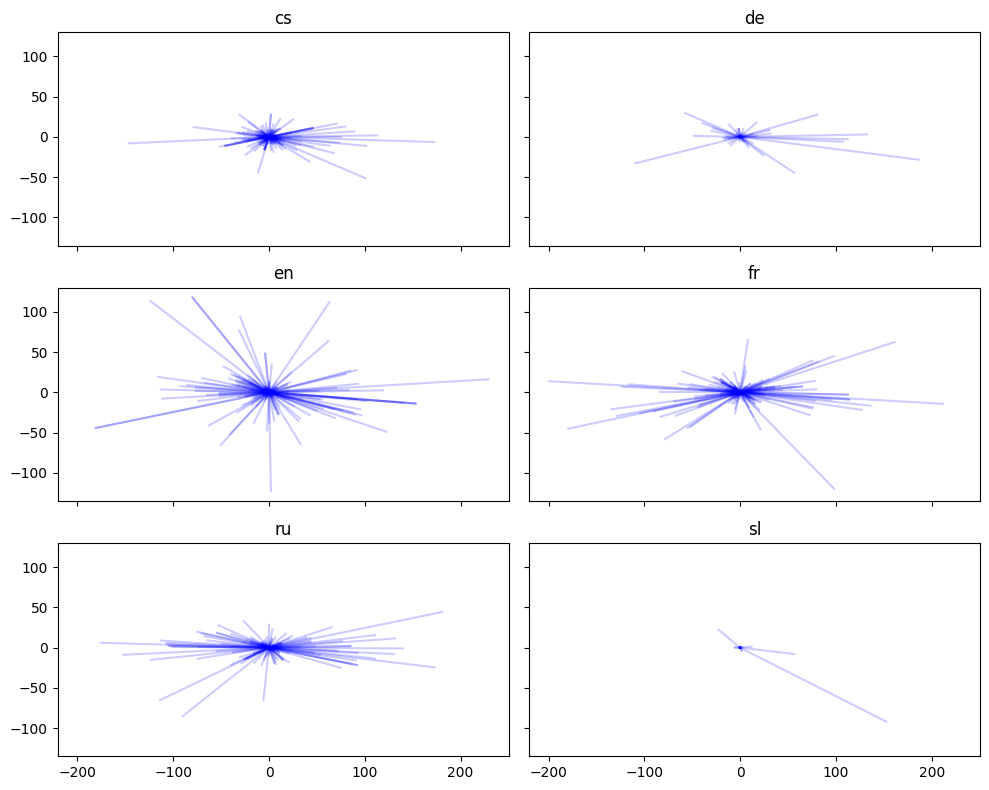

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()
for i, lang in enumerate(sorted(coords)):
    for c in coords[lang]:
        axes[i].plot(c['x'], c['y'], c='b', alpha=0.2)
    axes[i].set_title(lang)

plt.tight_layout()
plt.show()